## Feature Extraction
__Note__: 
- Running this notebook requires downloading and extracting the audio- and state data via _aircraft_detector/Notebooks/Data Acquisition.ipynb_
- Extracting the denoised spectra requires predicted ego-noise spectra, obtained via _aircraft_detector/Ego-Noise Prediction/Prediction.ipynb_
<br><br>

Spectral features are extracted using the __FeatureExtraction__ class. This class expects (again) the root directory of the dataset and, optionally, non-default feature parameters for extraction. This notebook extracts the Mel spectrogram of the audio in the aircraft detection set. <br><br>

The following features are available for extraction (case sensitive):
- Stft: standard spectrogram
- Mel: Mel spectrogram
- Cqt: Constant-Q transform
- Mfcc: Mel frequency cepstral coefficients
<br><br>

The following types of spectra are extracted:
- Clean spectra (no noise)
- Mixed spectra (added MAV noise)
- Denoised spectra (mixed spectra with MAV noise removed)

In [1]:
import os


# assign root directory
root_directory = os.path.join(os.pardir, os.pardir, os.pardir, 'Data')

# settings for feature extraction
spectrum_settings = {
    'feature': 'Mel',  # default = 'Stft'
    'fft_sample_rate': 44100,  # default
    'stft_window_length': 1024,  # default
    'stft_hop_length': 512,  # default
    'frequency_bins': 60,  # default
}

In [3]:
import aircraft_detector.aircraft_classification.feature_extraction as fe


# load feature extractor class with directory and feature settings
extractor = fe.FeatureExtraction(root_directory, spectrum_settings)

/home/mark/anaconda3/envs/thesis/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/mark/anaconda3/envs/thesis/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


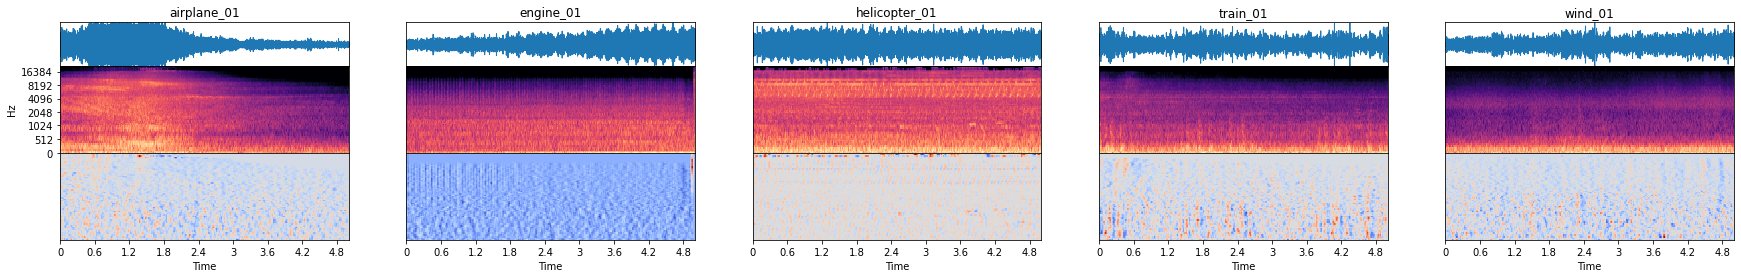

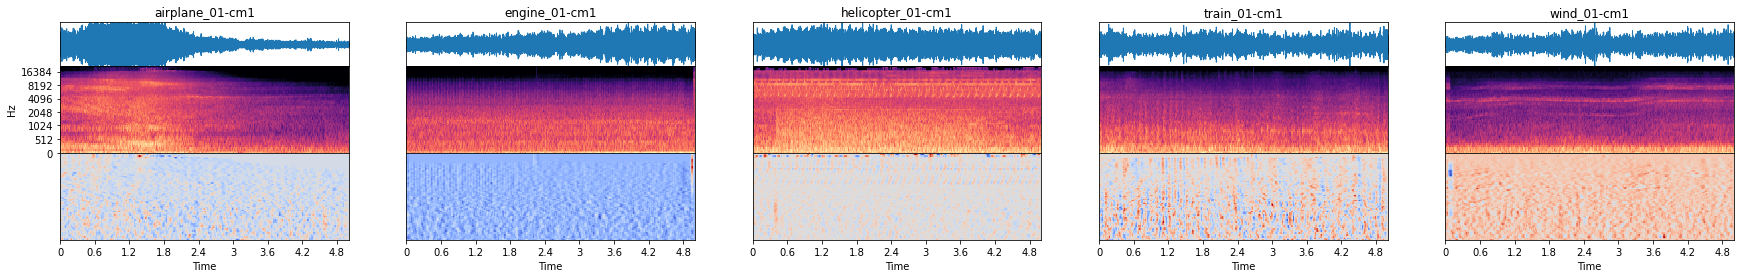

In [4]:
# extract clean dataset and plot some examples (scenario 1)
extractor.create_clean_dataset()
extractor.plot_spectra_clean('Train')
extractor.plot_spectra_clean('Test')

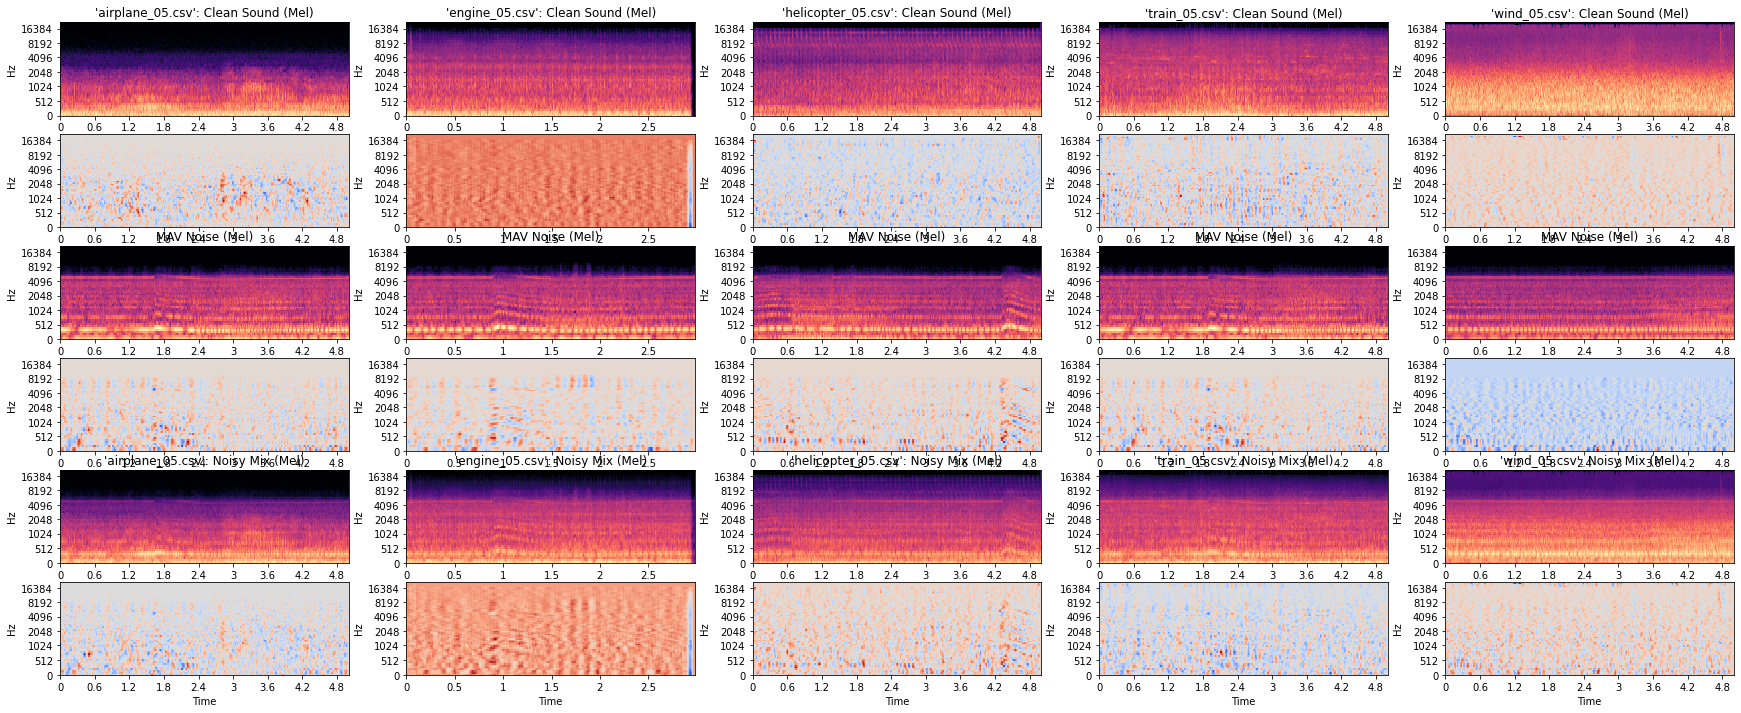

In [6]:
# extract mixed dataset at 1.00 ratio and plot example (scenario 2)
extractor.create_mixed_dataset(1.00)
extractor.plot_spectra_mixed('Test', 1.00)

# extract mixed test sets at ratios of 0.25, 0.50, 0.75
for noise_ratio in [0.25, 0.50, 0.75]:
    extractor.create_mixed_test_set(noise_ratio)

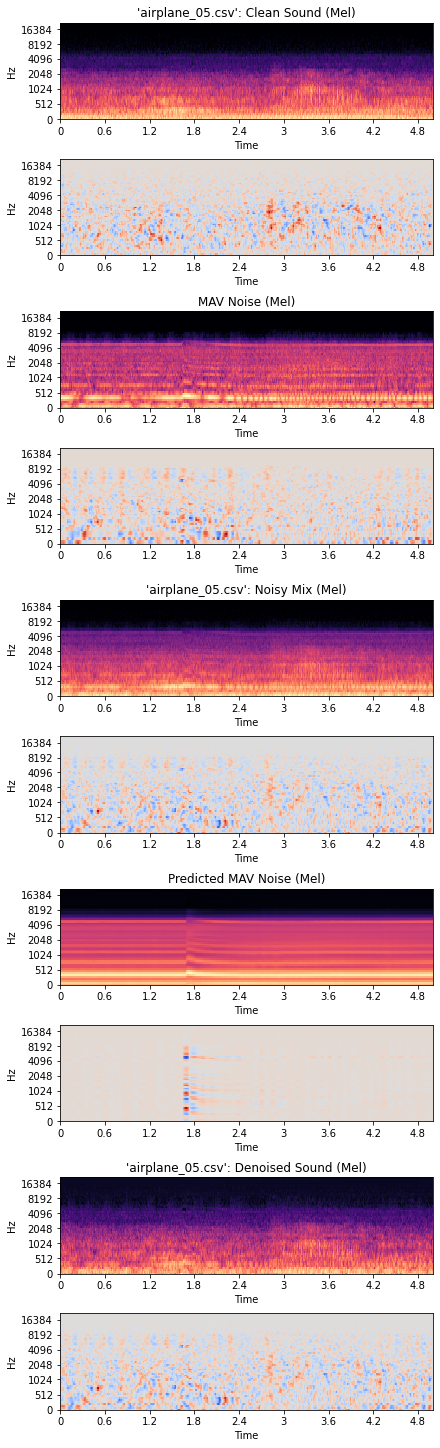

In [7]:
# denoise the mixed datasets and plot example (scenario 1)
for noise_ratio in [0.25, 0.50, 0.75, 1.00]:
    extractor.create_denoised_test_set(noise_ratio)
extractor.plot_spectra_denoised(1.00, categories=['airplane'])

# extract a fourth augmentation containing denoised training data (scenario 1)
extractor.create_denoised_train_augmentation_set(1.00)